In [40]:
import sys
sys.path.append('../')
from BMM.bern import BernMM
import numpy as np
import scipy.linalg as lin

In [41]:
mod1 = BernMM( nz=3, nx=5, prior_z = [0.7,0.2,0.1] )

In [42]:
mod2 = BernMM(nz=mod1.nz, nx=mod1.nx, prior_z=[0.5,0.2,0.3])


In [43]:
T = 1000
Z, X = mod1.sample(T=T)
for kk in range(mod1.nz):
    print( np.nanmean(X[Z==kk],axis=0)-mod1.mu_x[kk] )

[-0.0142932   0.00255289 -0.00717499 -0.01108492  0.01099901]
[ 0.00182704 -0.04463338 -0.00402359  0.00249957  0.01394808]
[ 0.03750996  0.00839572 -0.00397169 -0.02203211 -0.00110104]


In [44]:
use_kmeans=True
mod2.set_params( nz=mod2.nz, nx=mod2.nx, use_kmeans_init=use_kmeans, X_init=X )

In [45]:
ll0 = mod1.get_ll(X)
ll1 = mod2.get_ll(X)
gm = mod2.e_step(X)
mod2.m_step(X,gm)
ll2 = mod2.get_ll(X)
print(ll0-ll1)
print(ll2-ll1)


607.1307044533842
566.5953114148401


In [46]:
logL = mod2.fit_params(X, n_steps=200,tol=0.001)

Step 1: Log-likelihood increase = 10.9087
Step 11: Log-likelihood increase = 0.5252
Step 21: Log-likelihood increase = 0.1410
Step 31: Log-likelihood increase = 0.0811
Step 41: Log-likelihood increase = 0.0475
Step 51: Log-likelihood increase = 0.0271
Step 61: Log-likelihood increase = 0.0170
Step 71: Log-likelihood increase = 0.0120
Step 81: Log-likelihood increase = 0.0093
Step 91: Log-likelihood increase = 0.0077
Step 101: Log-likelihood increase = 0.0065
Step 111: Log-likelihood increase = 0.0057
Step 121: Log-likelihood increase = 0.0050
Step 131: Log-likelihood increase = 0.0043
Step 141: Log-likelihood increase = 0.0038
Step 151: Log-likelihood increase = 0.0033
Step 161: Log-likelihood increase = 0.0029
Step 171: Log-likelihood increase = 0.0025
Step 181: Log-likelihood increase = 0.0021
Step 191: Log-likelihood increase = 0.0018


In [47]:
print(mod1.prior_z)
states_order=np.argsort(1/mod2.prior_z)
mod2.prior_z[states_order]

[0.7 0.2 0.1]


array([0.66340659, 0.29180001, 0.0447934 ])

In [48]:
import matplotlib.pyplot as pp

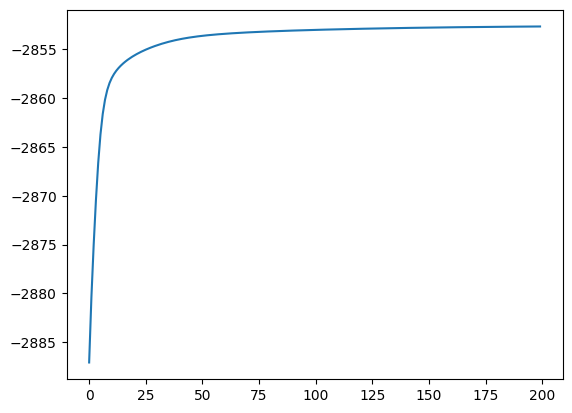

In [49]:
pp.plot(logL)

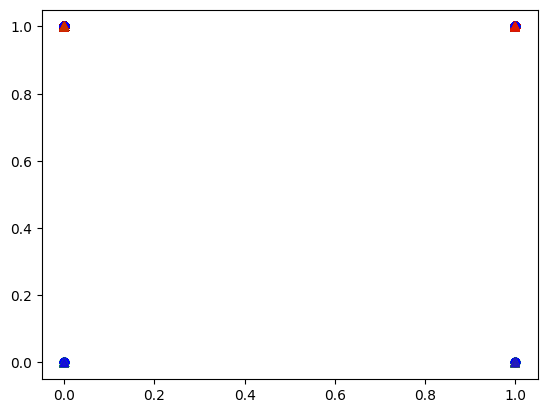

In [50]:
gm = mod2.e_step(X)

xx=0
yy=1
for kk in range(mod2.nz):
    use_t = np.where(Z==kk)[0]
    c=[0,0,0]
    c[kk]=1
    pp.scatter(X[use_t,xx],X[use_t,yy], color=c, alpha=0.3 )
    pp.scatter(X[use_t,xx], X[use_t,yy], marker='^', c=gm[np.ix_(use_t,states_order)], alpha=0.3)



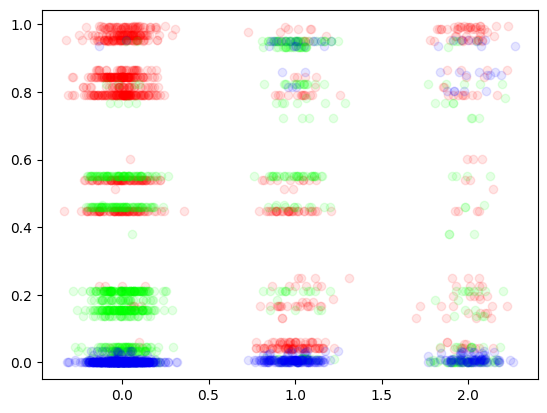

In [51]:
for kk in range(mod1.nz):
    cc=[0,0,0]
    cc[kk]=1
    pp.scatter(Z+np.random.randn(Z.shape[0])*0.1,gm[:,states_order[kk]],color=cc, alpha=0.1)

In [52]:
np.nanmedian(mod1.mu_x-mod2.mu_x[states_order,:])
for idx in range(mod1.nz):
    print('\nidx = '+np.str_(idx))
    print(mod1.mu_x[idx])
    print(mod2.mu_x[states_order[idx]])


idx = 0
[0.49844306 0.9772742  0.118126   0.32664688 0.36364076]
[0.46457014 0.96745203 0.1911862  0.36453532 0.3204917 ]

idx = 1
[0.30387244 0.42805307 0.19055209 0.05449525 0.72180321]
[0.37640791 0.61770247 0.0026814  0.09596703 0.68492659]

idx = 2
[0.31647234 0.61107331 0.51724602 0.50875777 0.34623378]
[0.37874493 0.04331792 0.9685218  0.33848037 0.63674798]
